In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
#Read CSV
data_path = 'Z:\\datascience\\Sales-prediction\\'
trainData = pd.read_csv(data_path+'Traing_data.csv')
testData = pd.read_csv(data_path+'/Testing_data.csv')

In [38]:
trainData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
testData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [40]:
trainData.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [41]:
trainData.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [42]:
trainData['source'] =  'train'
testData['source'] =  'test'

In [43]:
trainData['Outlet_Size'] = trainData['Outlet_Size'].fillna("")
trainData.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [44]:
testData['Outlet_Size'] = testData['Outlet_Size'].fillna("")
testData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [45]:
dataset = pd.concat([trainData, testData])
dataset.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [46]:
# cor = dataset.corr()
# sns.set(font_scale=1.25)
# plt.figure(figsize=(12,12))
# hm = sns.heatmap(cor, cbar=True, annot=True, square=True,
#                  fmt='.2f', annot_kws={'size': 10}, 
#                  yticklabels=list(cor.columns), xticklabels=list(cor.columns))
# plt.show()

In [47]:
missingValuesColumsCount = dataset.isnull().sum()
missingValuesColumsCount

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [48]:
#find the different types of categeories of item in each column using apply function and lambda
uniqueCategeories = dataset.apply(lambda x: len(x.unique()))
uniqueCategeories

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [49]:
categoricalObjects = [x for x in dataset.dtypes.index if dataset.dtypes[x] == 'O']
categoricalObjects = [x for x in categoricalObjects if x not in ['Item_Identifier','Outlet_Identifier','source']]

In [50]:
categoricalObjects

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

In [51]:
for column in categoricalObjects:
    print('--'*10)
    print('Column name: ', column)
    print(dataset[column].value_counts())

--------------------
Column name:  Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
--------------------
Column name:  Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
--------------------
Column name:  Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
--------------------
Column name:  Outlet_Size
Medium    4655
          4016
Small     3980
High      1553
Name: Outlet_Size, dtype: i

In [52]:
#finding missing values of Item_Weight
miss_bool = dataset['Item_Weight'].isnull()
# miss_bool

In [53]:
print("Missing values Count of Item_Weight: ", sum(miss_bool))

Missing values Count of Item_Weight:  2439


In [54]:
#finding average weight of Item identifier to replace missing values
avg_Item_Identifier = pd.pivot_table(dataset,index=['Item_Identifier'])
# avg_Item_Identifier


In [55]:
# dataset.loc[miss_bool, 'Item_Weight']

In [56]:
dataset.loc[miss_bool, 'Item_Weight'] =  dataset.loc[miss_bool, 'Item_Identifier'].apply(lambda x:avg_Item_Identifier['Item_Weight'][x] )

In [57]:
print("Missing values Count of Item_Weight: ", sum(dataset['Item_Weight'].isnull()))

Missing values Count of Item_Weight:  0


In [58]:
miss_bool = (dataset['Item_Visibility']==0)
print("Miss values of item visibility count:", sum(miss_bool))
dataset['Item_Visibility'].describe()

Miss values of item visibility count: 879


count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [59]:
#finding average weight of Item identifier to replace missing values
dataset.loc[miss_bool, 'Item_Visibility'] =  dataset.loc[miss_bool, 'Item_Identifier'].apply(lambda x:avg_Item_Identifier['Item_Visibility'][x] )

In [60]:
miss_bool = (dataset['Item_Visibility']==0)
print("Miss values of item visibility count:", sum(miss_bool))


Miss values of item visibility count: 0


In [61]:
dataset['Item_Visibility'].describe()

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

In [62]:
avg_visibility = avg_Item_Identifier['Item_Visibility']
dataset['Item_visibility_mean_ratio'] = dataset.apply( lambda x: x['Item_Visibility']/avg_visibility[x['Item_Identifier']], axis=1)
dataset['Item_visibility_mean_ratio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_visibility_mean_ratio, dtype: float64

In [63]:
dataset['item_type_generalize'] = dataset['Item_Identifier'].apply(lambda x: x[0:2])

In [64]:
dataset['item_type_generalize'] = dataset['item_type_generalize'].map({'FD': 'Food',
                                                                       'NC': 'Non-Consumable',
                                                                       'DR': 'Drinks'})

dataset['item_type_generalize'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: item_type_generalize, dtype: int64

In [65]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [66]:
#replace LF, low fat into Low Fat and reg into Regular
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'LF': 'Low Fat',
                                                               'low fat': 'Low Fat',
                                                               'reg': 'Regular'
    
                                                            })

In [67]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [68]:

dataset['Outlet_Years']=2013-dataset['Outlet_Establishment_Year']
dataset['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [69]:
dataset.loc[dataset['item_type_generalize'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

In [70]:
dataset['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

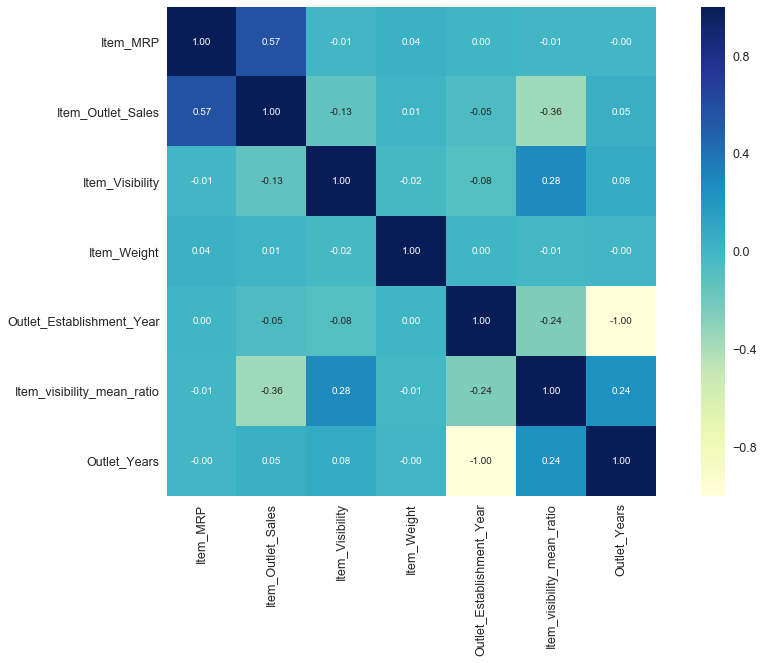

In [71]:


cor = dataset.corr()
sns.set(font_scale=1.25)
plt.figure(figsize=(16,9))
hm = sns.heatmap(cor, cbar=True, annot=True, square=True,cmap="YlGnBu",
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=list(cor.columns), xticklabels=list(cor.columns))
plt.show()


# # ref: https://www.kaggle.com/fg1983/data-exploration-and-price-prediction-house-sales

In [72]:
#Outlet Identifier is the store number /name so changed it also to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Outlet']=le.fit_transform(dataset['Outlet_Identifier'])
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','item_type_generalize','Outlet_Type','Outlet']
for i in var_mod:
    dataset[i]=le.fit_transform(dataset[i])

dataset=pd.get_dummies(dataset,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','item_type_generalize','Outlet_Type','Outlet'])

In [73]:
# cor = dataset.corr()
# sns.set(font_scale=1.25)
# plt.figure(figsize=(16,9))
# hm = sns.heatmap(cor, cbar=True, annot=True, square=True,
#                  fmt='.2f', annot_kws={'size': 10}, 
#                  yticklabels=list(cor.columns), xticklabels=list(cor.columns))
# plt.show()


# # ref: https://www.kaggle.com/fg1983/data-exploration-and-price-prediction-house-sales

In [74]:
dataset.dtypes

Item_Identifier                object
Item_MRP                      float64
Item_Outlet_Sales             float64
Item_Type                      object
Item_Visibility               float64
Item_Weight                   float64
Outlet_Establishment_Year       int64
Outlet_Identifier              object
source                         object
Item_visibility_mean_ratio    float64
Outlet_Years                    int64
Item_Fat_Content_0              uint8
Item_Fat_Content_1              uint8
Item_Fat_Content_2              uint8
Outlet_Location_Type_0          uint8
Outlet_Location_Type_1          uint8
Outlet_Location_Type_2          uint8
Outlet_Size_0                   uint8
Outlet_Size_1                   uint8
Outlet_Size_2                   uint8
Outlet_Size_3                   uint8
item_type_generalize_0          uint8
item_type_generalize_1          uint8
item_type_generalize_2          uint8
Outlet_Type_0                   uint8
Outlet_Type_1                   uint8
Outlet_Type_

In [75]:
#find unique outlet identifier
dataset['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [76]:
dataset.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_visibility_mean_ratio,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,0.931078,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,0.933420,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,0.960069,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,train,1.000000,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,train,1.000000,...,0,1,0,0,0,0,0,0,0,0


Text(0,0.5,'Item Outlet Sales')

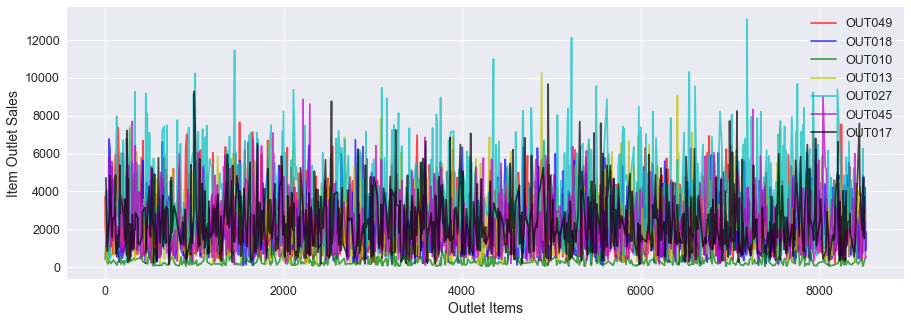

In [77]:
# colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71",'y']
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k']

for i, s in enumerate(dataset.Outlet_Identifier.unique()[:7]):
    dataset[dataset['Outlet_Identifier'] == s].Item_Outlet_Sales.plot(c=colors[i], figsize=(15, 5), label=s, alpha=.7)
plt.legend(loc='best');
plt.xlabel('Outlet Items', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

In [78]:
#get the sale data of each store in different variables
'''
['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019']
'''
data_OUT049 = dataset[dataset['Outlet_Identifier'] == 'OUT049']
data_OUT018 = dataset[dataset['Outlet_Identifier'] == 'OUT018']
data_OUT010 = dataset[dataset['Outlet_Identifier'] == 'OUT010']
data_OUT013 = dataset[dataset['Outlet_Identifier'] == 'OUT013']
data_OUT027 = dataset[dataset['Outlet_Identifier'] == 'OUT027']
data_OUT045 = dataset[dataset['Outlet_Identifier'] == 'OUT045']
data_OUT017 = dataset[dataset['Outlet_Identifier'] == 'OUT017']
data_OUT046 = dataset[dataset['Outlet_Identifier'] == 'OUT046']
data_OUT035 = dataset[dataset['Outlet_Identifier'] == 'OUT035']
data_OUT019 = dataset[dataset['Outlet_Identifier'] == 'OUT019']

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


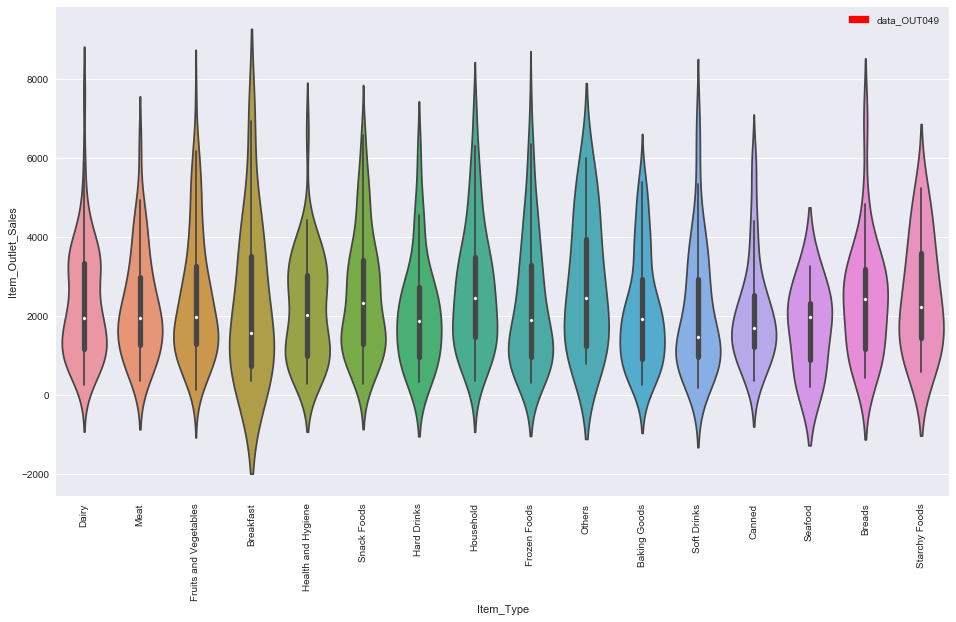

In [79]:
# data_OUT049.boxplot(column = 'Item_Outlet_Sales', by='Item_Type', figsize=(12,6))
# plt.xticks(rotation=90)
# red_patch = mpatches.Patch(color='red', label='OUT049 Sales')
# plt.legend(handles=[red_patch])


sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT049, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT049')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


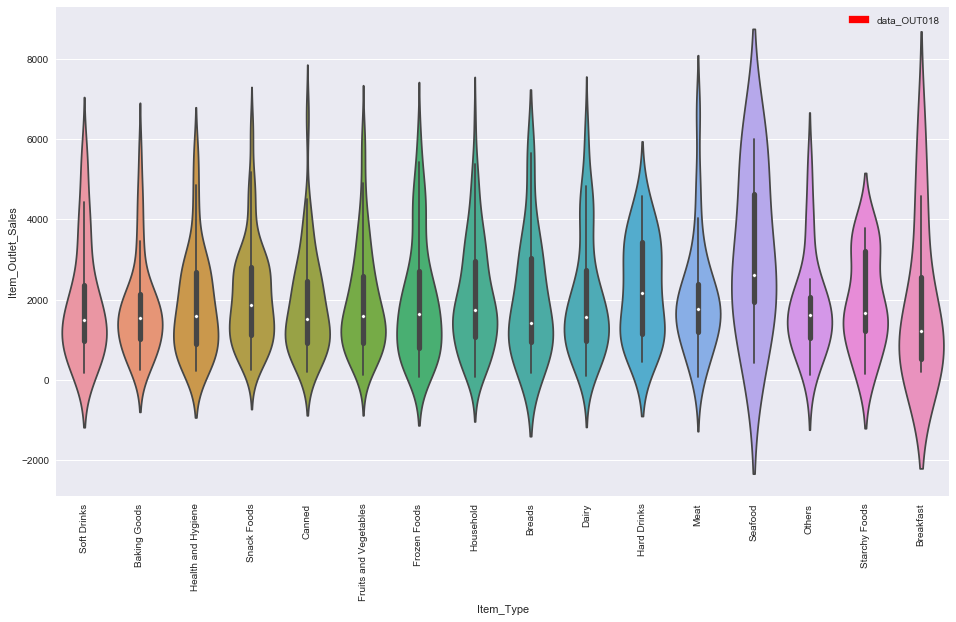

In [80]:
# data_OUT018.boxplot(column = 'Item_Outlet_Sales', by='Item_Type', figsize=(12,6))
# plt.xticks(rotation=90)
# red_patch = mpatches.Patch(color='red', label='OUT018 Sales')
# plt.legend(handles=[red_patch])


sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT018, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT018')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


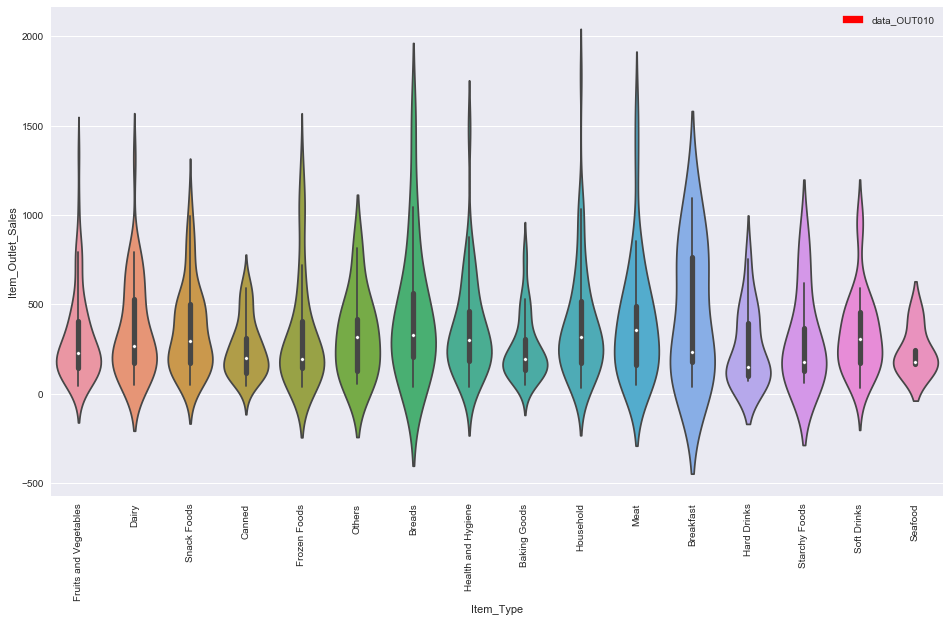

In [81]:
# data_OUT010.boxplot(column = 'Item_Outlet_Sales', by='Item_Type', figsize=(12,6))
# plt.xticks(rotation=90)
# red_patch = mpatches.Patch(color='red', label='OUT010 Sales')
# plt.legend(handles=[red_patch])


sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT010, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT010')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


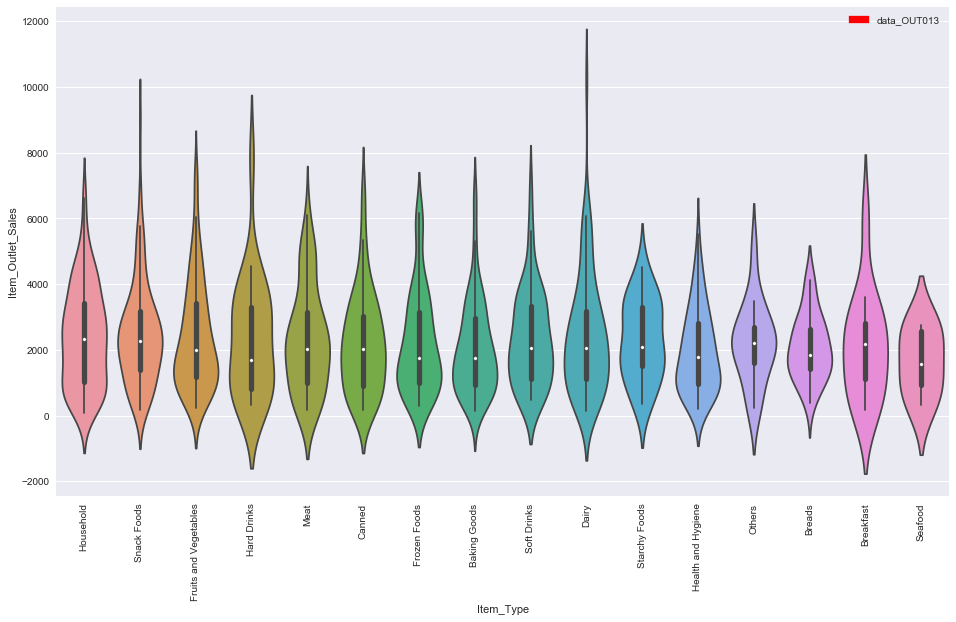

In [82]:
# data_OUT013.boxplot(column = 'Item_Outlet_Sales', by='Item_Type', figsize=(12,6))
# plt.xticks(rotation=90)
# red_patch = mpatches.Patch(color='red', label='OUT013 Sales')
# plt.legend(handles=[red_patch])

sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT013, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT013')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


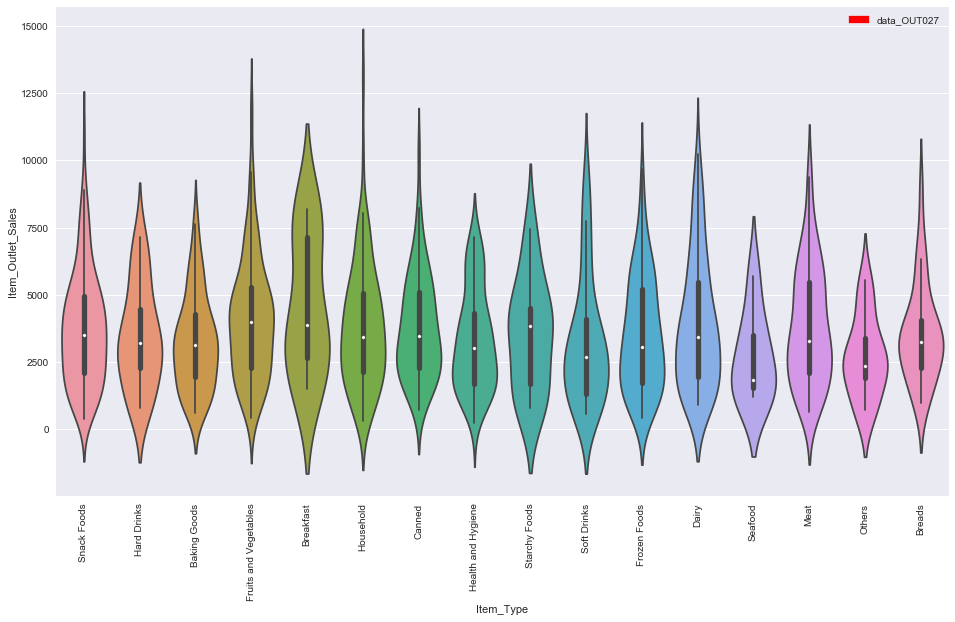

In [83]:
# data_OUT027.boxplot(column = 'Item_Outlet_Sales', by='Item_Type', figsize=(12,6))
# plt.xticks(rotation=90)
# red_patch = mpatches.Patch(color='red', label='OUT027 Sales')
# plt.legend(handles=[red_patch])

sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT027, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT027')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


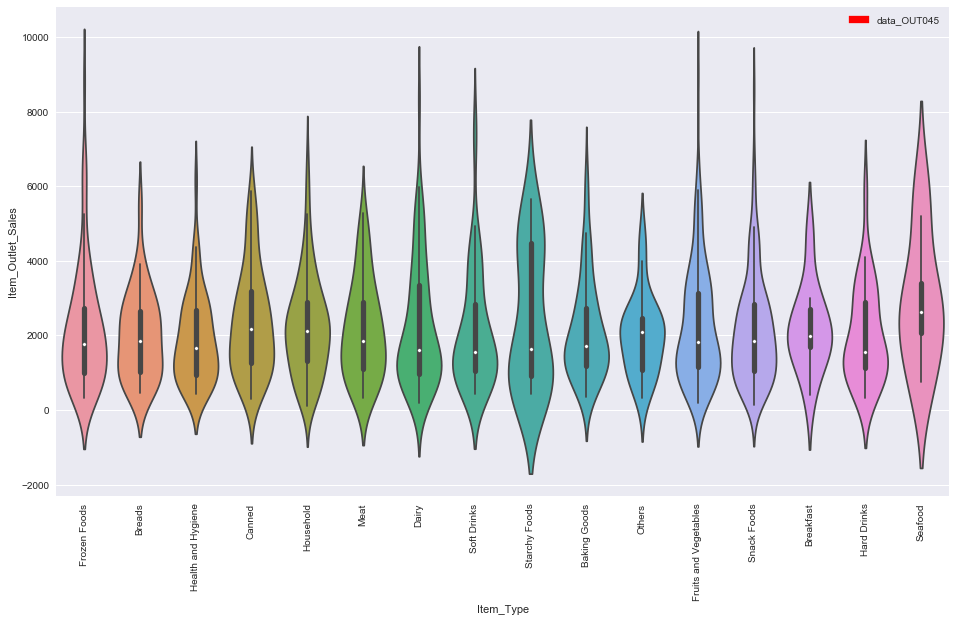

In [84]:
# data_OUT045.boxplot(column = 'Item_Outlet_Sales', by='Item_Type', figsize=(12,6))
# plt.xticks(rotation=90)
# red_patch = mpatches.Patch(color='red', label='OUT045 Sales')
# plt.legend(handles=[red_patch])


sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT045, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT045')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


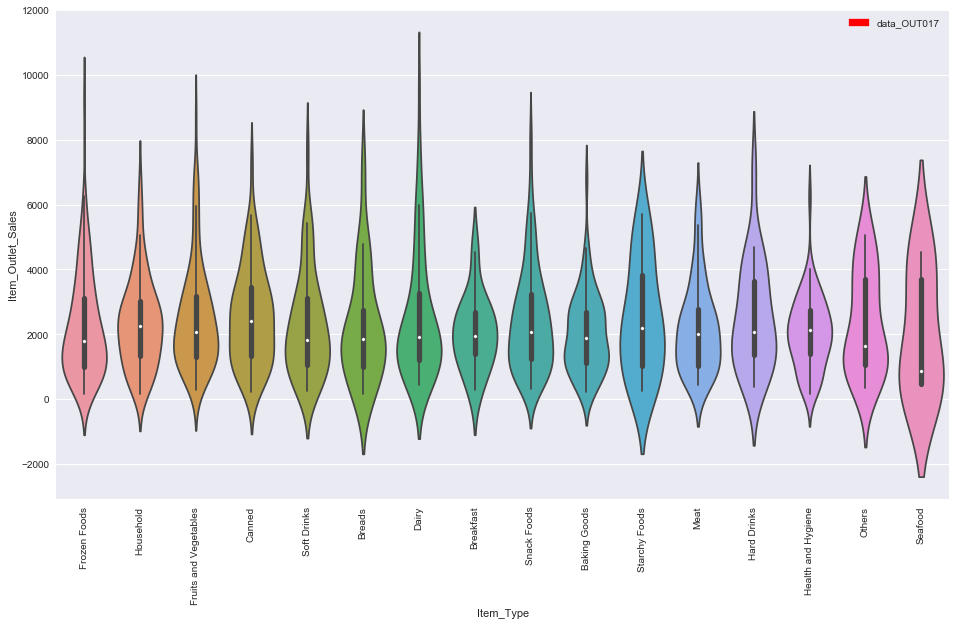

In [85]:
# data_OUT017.boxplot(column = 'Item_Outlet_Sales', by='Item_Type', figsize=(12,6))
# plt.xticks(rotation=90)
# red_patch = mpatches.Patch(color='red', label='OUT017 Sales')
# plt.legend(handles=[red_patch])

sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT017, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT017')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


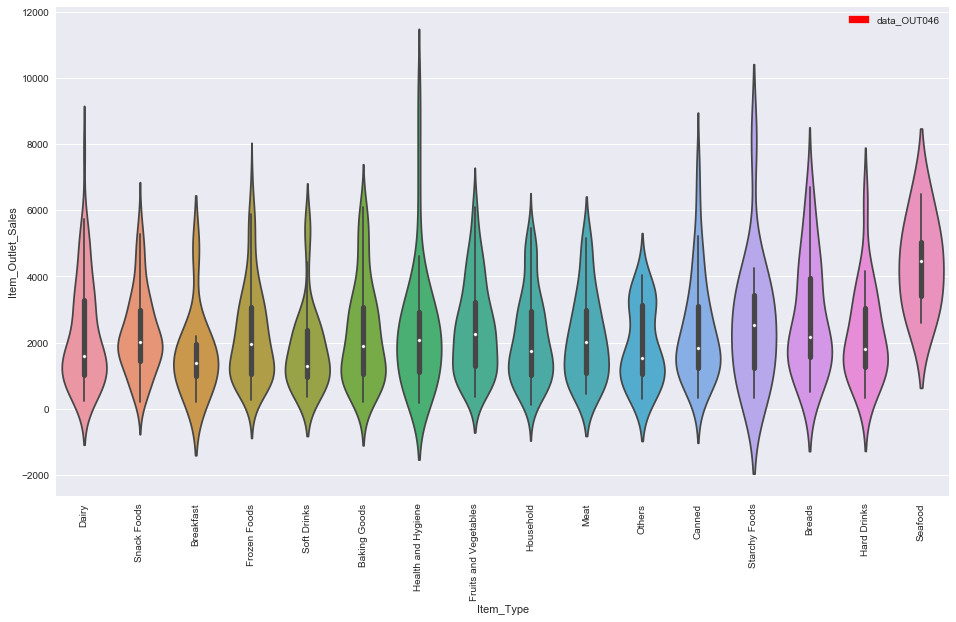

In [86]:
# data_OUT046.boxplot(column = 'Item_Outlet_Sales', by='Item_Type', figsize=(12,6))
# plt.xticks(rotation=90)
# red_patch = mpatches.Patch(color='red', label='OUT046 Sales')
# plt.legend(handles=[red_patch])

sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT046, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT046')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


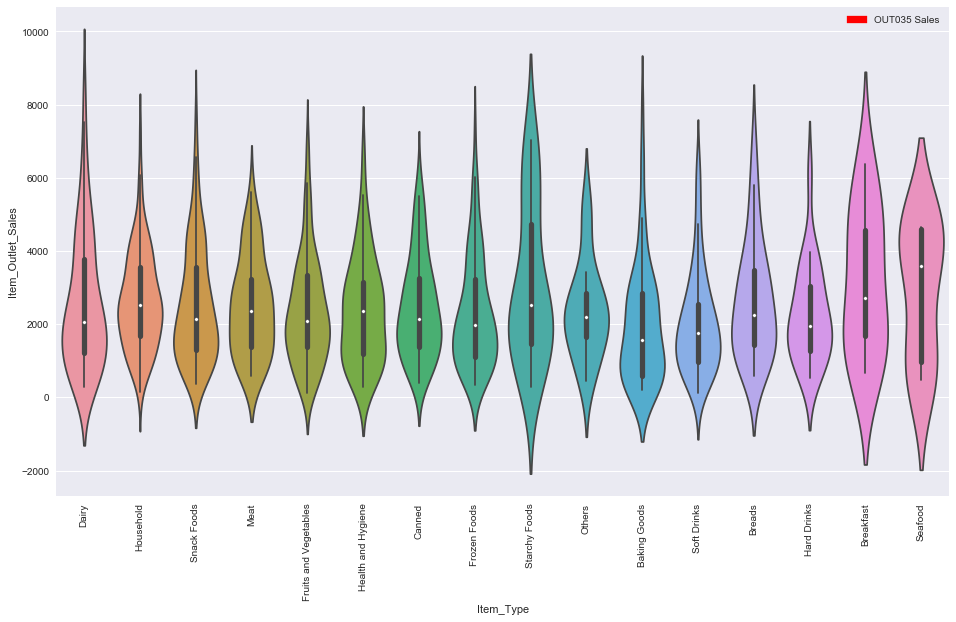

In [87]:
# data_OUT035.boxplot(column = 'Item_Outlet_Sales', by='Item_Type', figsize=(16,9))
# plt.xticks(rotation=90)
# red_patch = mpatches.Patch(color='red', label='OUT035 Sales')
# plt.legend(handles=[red_patch])

sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT035, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='OUT035 Sales')
plt.xticks(rotation=90)
plt.legend(handles=[red_patch])
plt.show()

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


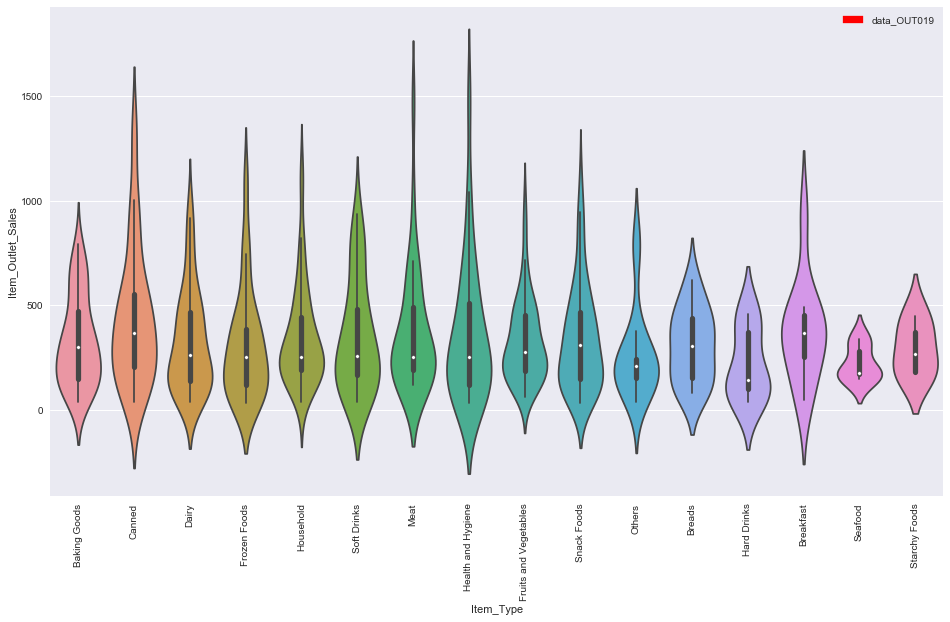

In [88]:
# data_OUT019.boxplot(column = 'Item_Outlet_Sales', by='Item_Type', figsize=(12,6))
# plt.xticks(rotation=90)
# red_patch = mpatches.Patch(color='red', label='OUT019 Sales')
# plt.legend(handles=[red_patch])
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT019, scale="width", height=20)
plt.xticks(rotation=90)
red_patch = mpatches.Patch(color='red', label='data_OUT019')
plt.legend(handles=[red_patch])
plt.show()

# Item Visibility with item outlet sales

In [89]:
dataset.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_visibility_mean_ratio,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,0.931078,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,0.933420,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,0.960069,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,train,1.000000,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,train,1.000000,...,0,1,0,0,0,0,0,0,0,0


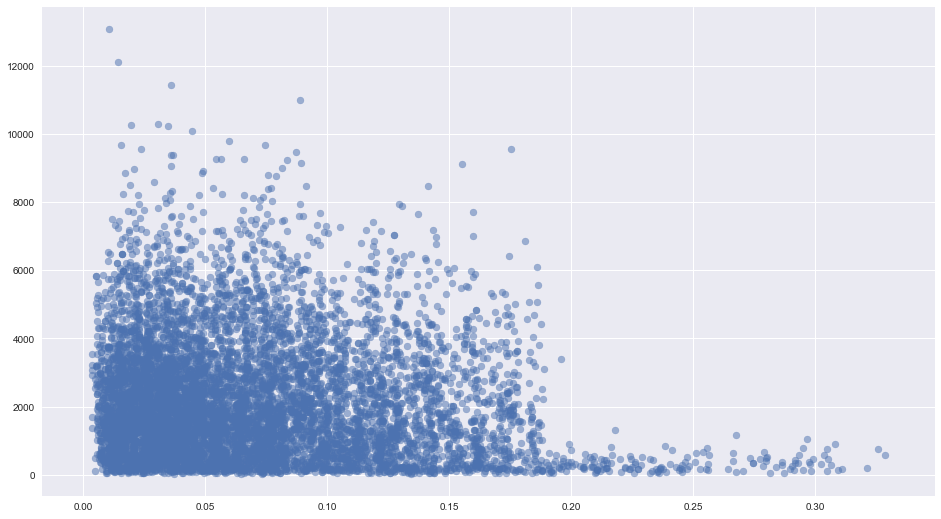

In [90]:
plt.scatter(dataset.Item_Visibility, dataset.Item_Outlet_Sales, alpha = 0.5)

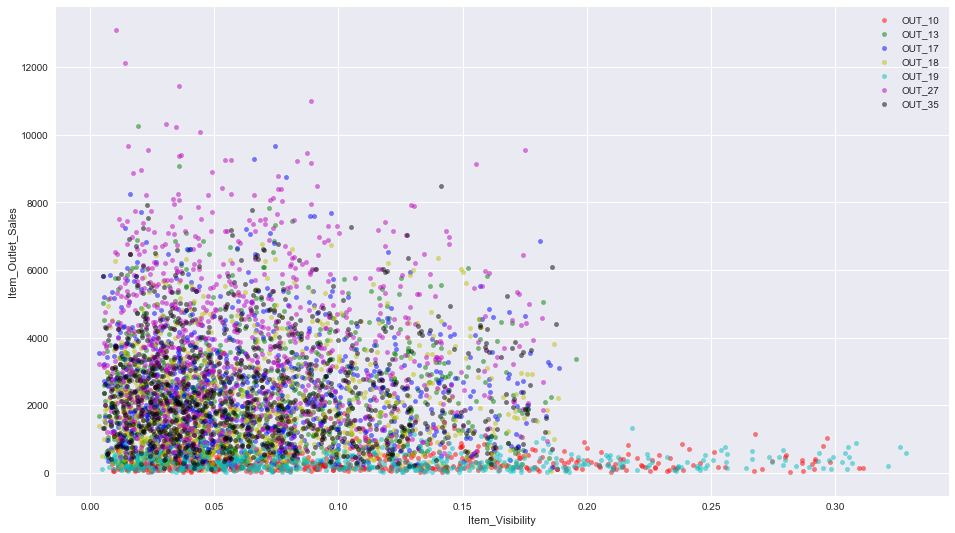

In [91]:
ax = data_OUT010.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='r', alpha=0.5, label='OUT_10', figsize=(16,9))
data_OUT013.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='g', ax=ax, alpha=0.5, label='OUT_13')
data_OUT017.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='b', ax=ax, alpha=0.5, label='OUT_17')
data_OUT018.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='y', ax=ax, alpha=0.5, label='OUT_18')
data_OUT019.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='c', ax=ax, alpha=0.5, label='OUT_19')
data_OUT027.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='m', ax=ax, alpha=0.5, label='OUT_27')
data_OUT035.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='k', ax=ax, alpha=0.5, label='OUT_35')
plt.legend(loc='best');

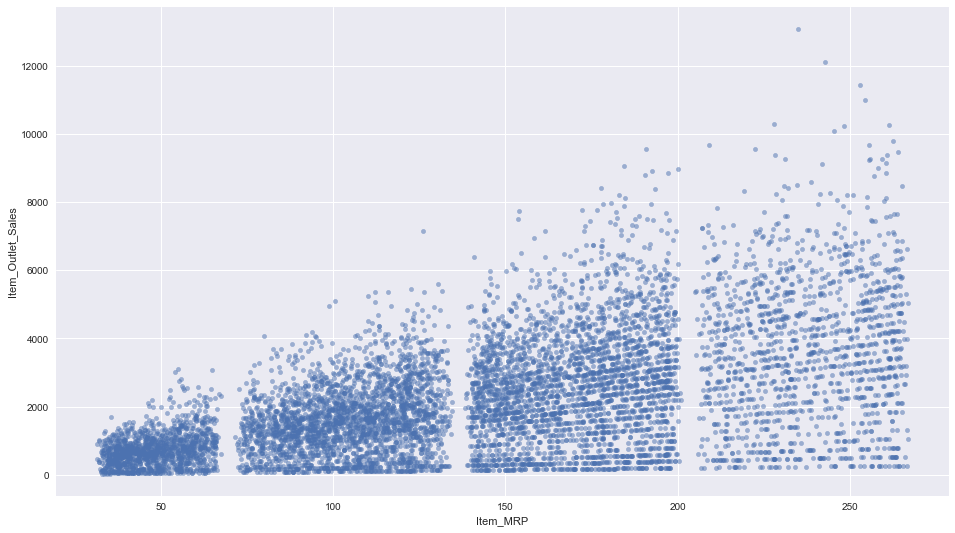

In [92]:
dataset.plot(kind='scatter', x = 'Item_MRP', y = 'Item_Outlet_Sales', alpha = 0.5, figsize=(16,9))

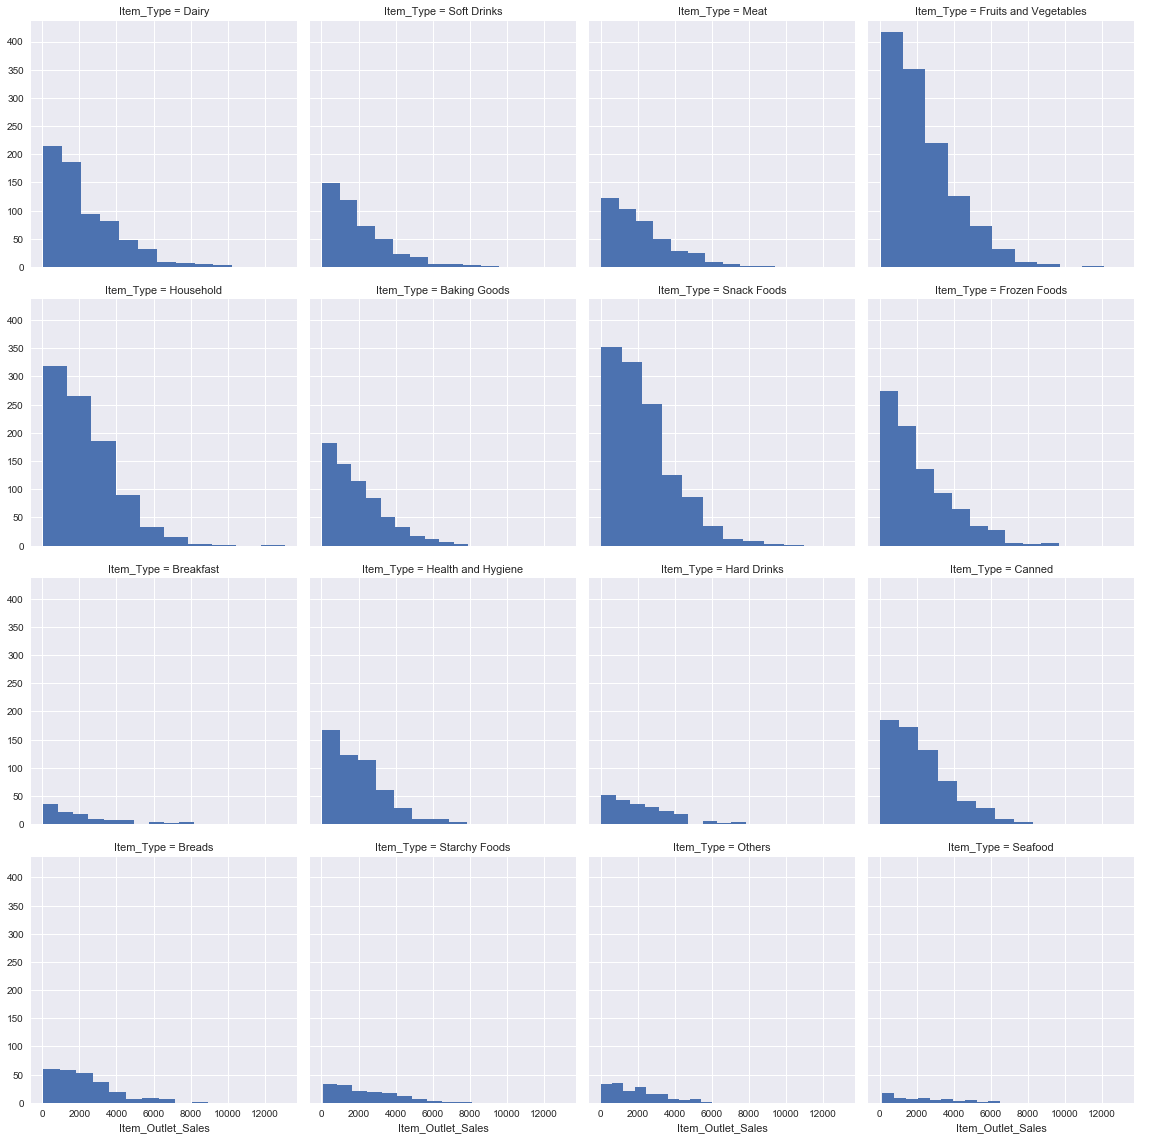

In [93]:
sns.FacetGrid(dataset, col='Item_Type', size=4, col_wrap=4) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

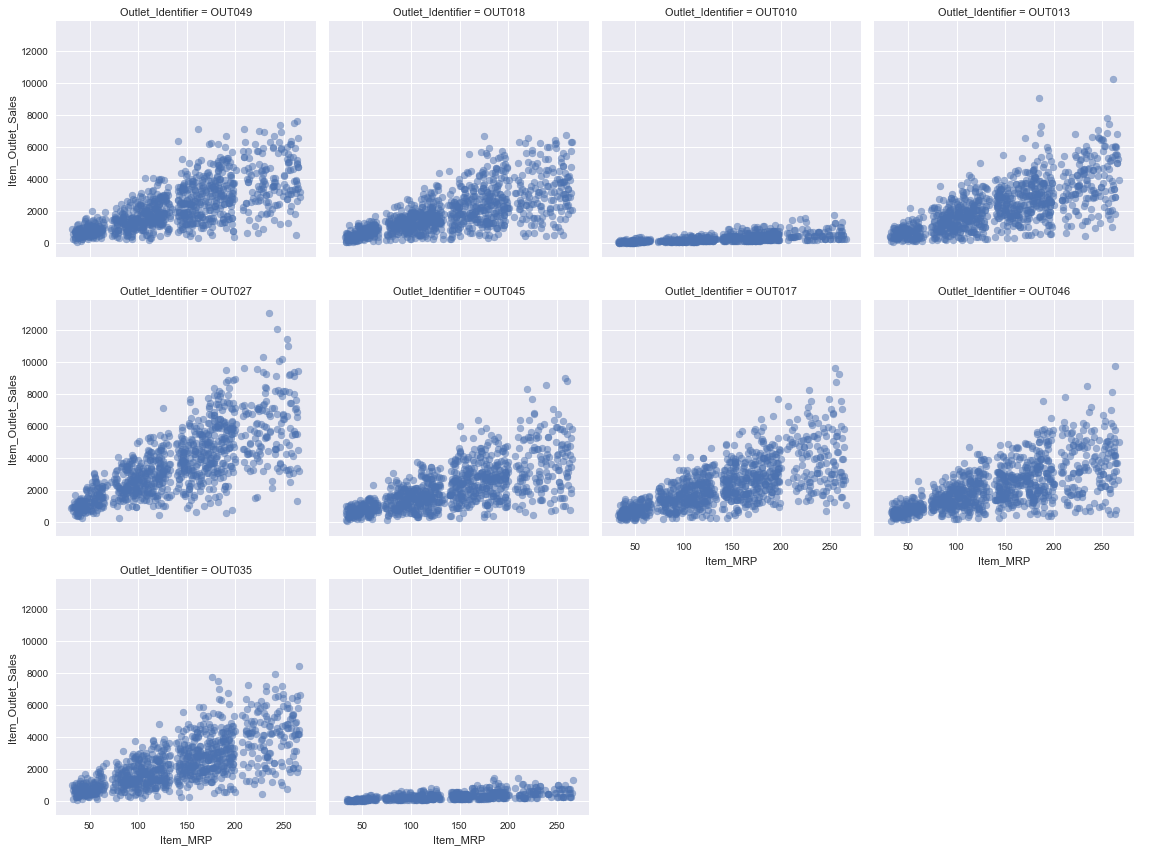

In [94]:
sns.FacetGrid(dataset, col='Outlet_Identifier', col_wrap=4, size=4) \
    .map(plt.scatter, 'Item_MRP', 'Item_Outlet_Sales',  alpha=0.5) \
    .add_legend();

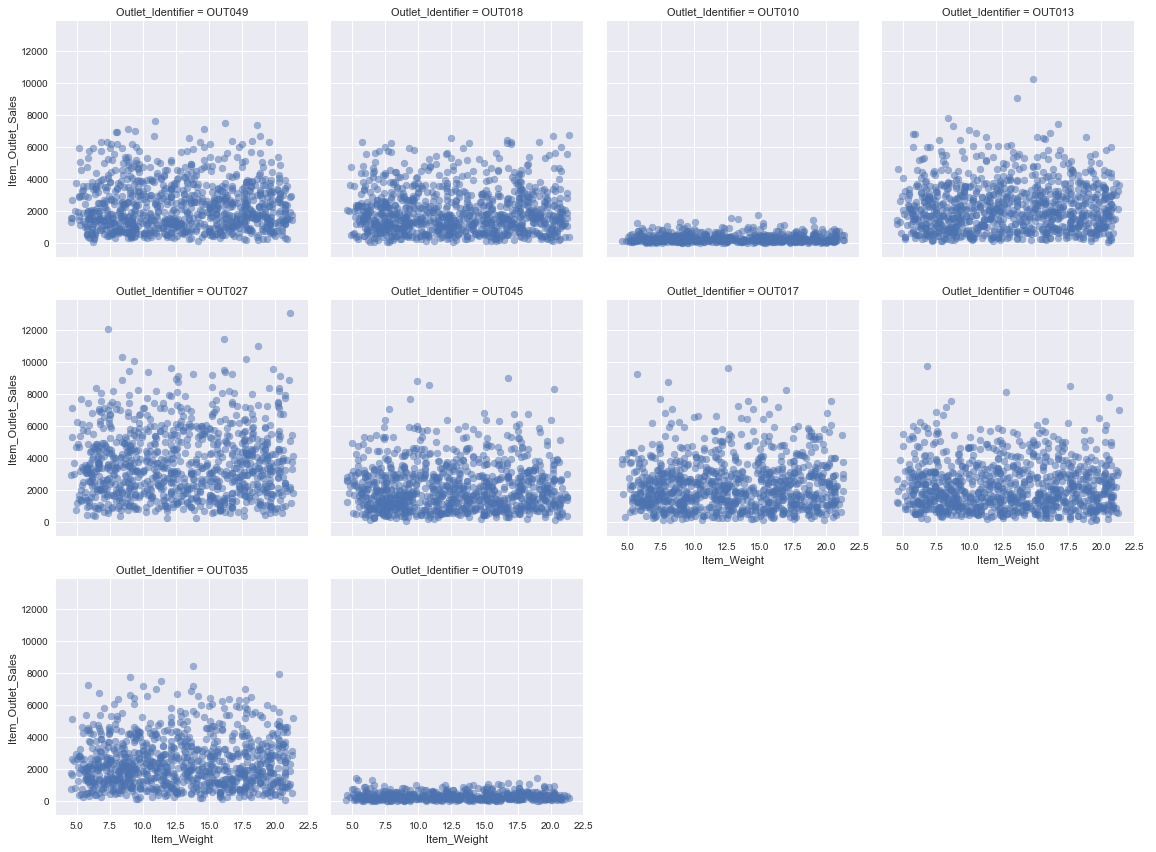

In [95]:
sns.FacetGrid(dataset, col='Outlet_Identifier', col_wrap=4, size=4) \
    .map(plt.scatter, 'Item_Weight', 'Item_Outlet_Sales', alpha=0.5) \
    .add_legend();

In [96]:
dataset.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_visibility_mean_ratio,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,0.931078,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,0.933420,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,0.960069,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,train,1.000000,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,train,1.000000,...,0,1,0,0,0,0,0,0,0,0


In [97]:
del dataset['Item_Type']
trainData = dataset.loc[dataset['source'] =='train']
testData = dataset.loc[dataset['source'] =='test']

In [98]:
trainData.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_visibility_mean_ratio,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,1999,OUT049,train,0.931078,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,2009,OUT018,train,0.933420,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,1999,OUT049,train,0.960069,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,1998,OUT010,train,1.000000,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,1987,OUT013,train,1.000000,26,...,0,1,0,0,0,0,0,0,0,0


In [99]:
testData.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_visibility_mean_ratio,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,107.8622,NaN,0.007565,20.750,1999,OUT049,test,1.029192,14,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,87.3198,NaN,0.038428,8.300,2007,OUT017,test,1.130311,6,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,241.7538,NaN,0.099575,14.600,1998,OUT010,test,1.735215,15,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,155.0340,NaN,0.015388,7.315,2007,OUT017,test,1.291577,6,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,234.2300,NaN,0.118599,13.600,1985,OUT027,test,0.917824,28,...,0,0,0,0,0,1,0,0,0,0


In [100]:
del trainData['source']
del testData['source']

In [101]:
del testData['Item_Outlet_Sales']


In [102]:
meanSalesData = trainData['Item_Outlet_Sales'].mean()
meanSalesData
finalOutput = testData[['Item_Identifier','Outlet_Identifier']]

In [103]:
finalOutput['Item_Outlet_Sales'] = meanSalesData
# finalOutput

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
finalOutput['Item_Outlet_Sales'] = finalOutput['Outlet_Identifier'].apply(lambda x: trainData.loc[trainData['Outlet_Identifier']==x]['Item_Outlet_Sales'].mean())

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
finalOutput.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2348.354635
1,FDW14,OUT017,2340.675263
2,NCN55,OUT010,339.351662
3,FDQ58,OUT017,2340.675263
4,FDY38,OUT027,3694.038558


In [106]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [107]:
# Linear Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor
%matplotlib inline

predictors = [x for x in trainData.columns if x not in ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier']]
alg1= LinearRegression(normalize=True)

In [108]:
#fit the algorithm on the data
alg1.fit(trainData[predictors],trainData['Item_Outlet_Sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [109]:
#predict training data set
train_predictions = alg1.predict(trainData[predictors])

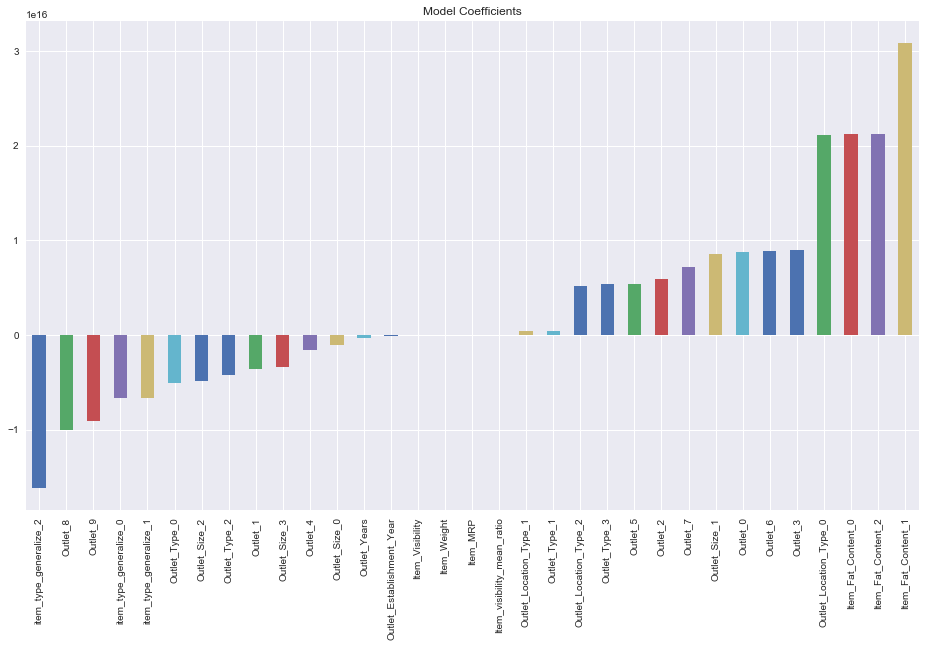

In [131]:
train_predictions
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients',figsize=(16,9))

In [111]:
#performs cross validation
import numpy as np
target = 'Item_Outlet_Sales'
cv_score = cross_val_score(alg1,trainData[predictors],trainData[target],cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))

In [112]:
cv_score

array([1210.34878413, 1114.51084585, 1136.76656898, 1145.51155576,
       1139.74302985, 1103.88247881, 1082.53710961, 1132.44491202,
       1130.20192752, 1108.78166694, 1084.9118704 , 1131.76035976,
       1152.54019031, 1075.14221931, 1077.80948298, 1192.76119777,
       1194.33248051, 1079.55331979, 1209.04323979, 1075.9764432 ])

In [113]:
#Print model report
print( "\nModel Report :")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(trainData[target].values,train_predictions)))
print( "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report :
RMSE : 1128
CV Score : Mean - 1129 | Std - 43.88 | Min - 1075 | Max - 1210


In [114]:
# testData.head()

In [115]:
#Predict on testing data
testData[target]=alg1.predict(testData[predictors])

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
# testData.head()

In [117]:
# trainData.head()

In [118]:
unique_product_OUT049 = trainData['Item_Identifier'][trainData['Outlet_Identifier']=='OUT049'].unique()

In [119]:
# unique_product_OUT049
product_OUT049 = trainData[['Item_Identifier', 'Item_Outlet_Sales']]

In [120]:
#Ridge Regression
predictors = [x for x in trainData.columns if x not in ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier']]
alg2=Ridge(alpha=0.05,normalize=True)

#fit the algorithm on the data
alg2.fit(trainData[predictors],trainData[target])


Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [129]:
#predict training data set
train_predictions = alg2.predict(trainData[predictors])

#Predict on testing data
testData[target]=alg2.predict(testData[predictors])
#performs cross validation
cv_score = cross_val_score(alg2,trainData[predictors],trainData[target],cv=20,scoring='neg_mean_squared_error')
# cv_score = cross_val_score(alg1,trainData[predictors],trainData[target],cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
#Print model report
print ("\nModel Report :")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(trainData[target].values,train_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """



Model Report :
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.63 | Min - 1076 | Max - 1217


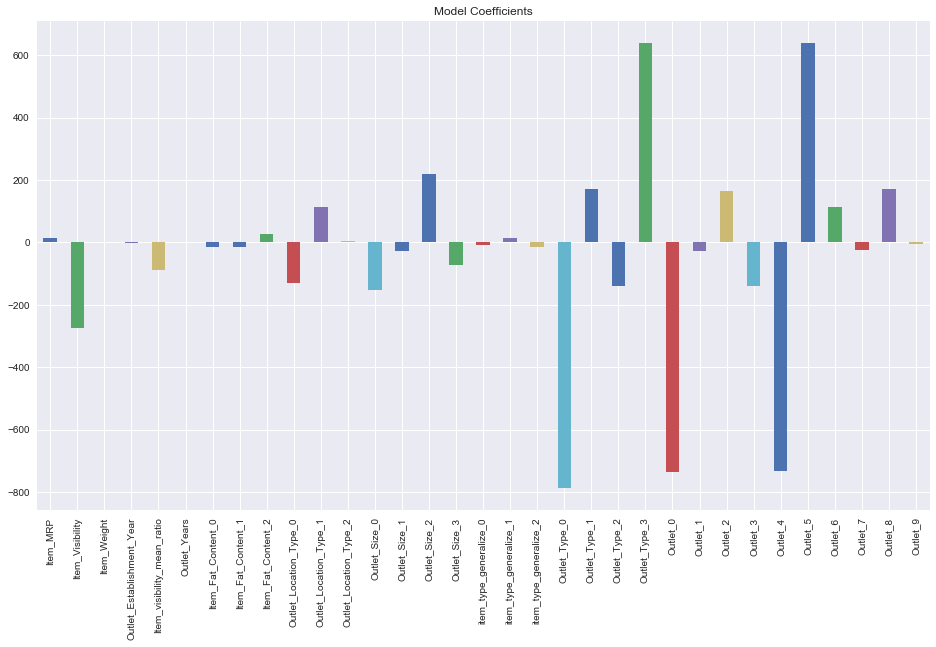

In [122]:
coef2 = pd.Series(alg2.coef_,predictors)
coef2.plot(kind='bar',title = 'Model Coefficients',figsize=(16,9))

In [123]:

ada1=AdaBoostRegressor(base_estimator=alg1,learning_rate=0.9)
#fit the algorithm on the data
ada1.fit(trainData[predictors],trainData[target])


AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
         learning_rate=0.9, loss='linear', n_estimators=50,
         random_state=None)

In [124]:
#predict training data set
train_predictions = ada1.predict(trainData[predictors])

#Predict on testing data
testData[target]=ada1.predict(testData[predictors])

cv_score = cross_val_score(ada1,trainData[predictors],trainData[target],cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
#Print model report
print ("\nModel Report :")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(trainData[target].values,train_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """



Model Report :
RMSE : 1147
CV Score : Mean - 1159 | Std - 40.96 | Min - 1085 | Max - 1230


In [125]:
#DecisionTree Model
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in trainData.columns if x not in ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier']]
alg3=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
ada2=AdaBoostRegressor(base_estimator=alg3)#,learning_rate=0.9)

ada2.fit(trainData[predictors],trainData[target])

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

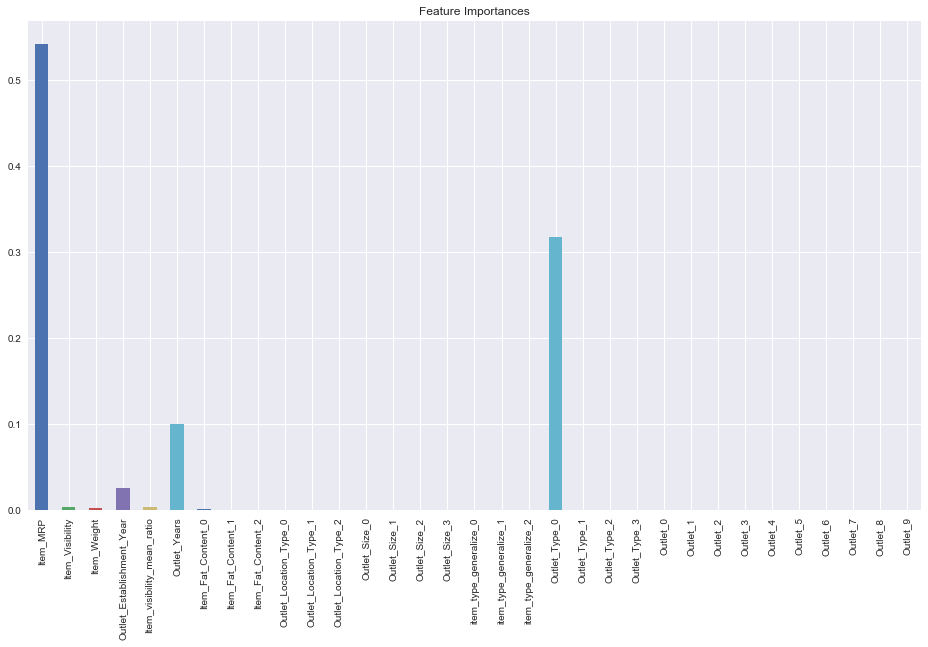

In [126]:
alg3=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
alg3.fit(trainData[predictors],trainData[target])
coef5=pd.Series(alg3.feature_importances_,predictors)
coef5.plot(kind='bar',title='Feature Importances',figsize=(16,9))

In [127]:
cv_score =cross_val_score(ada2,trainData[predictors],trainData[target],cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
#Print model report
print( "\nModel Report :")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(trainData[target].values,train_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report :
RMSE : 1147
CV Score : Mean - 1247 | Std - 45.92 | Min - 1164 | Max - 1346



Model Report :
RMSE : 1147
CV Score : Mean - 1247 | Std - 45.92 | Min - 1164 | Max - 1346


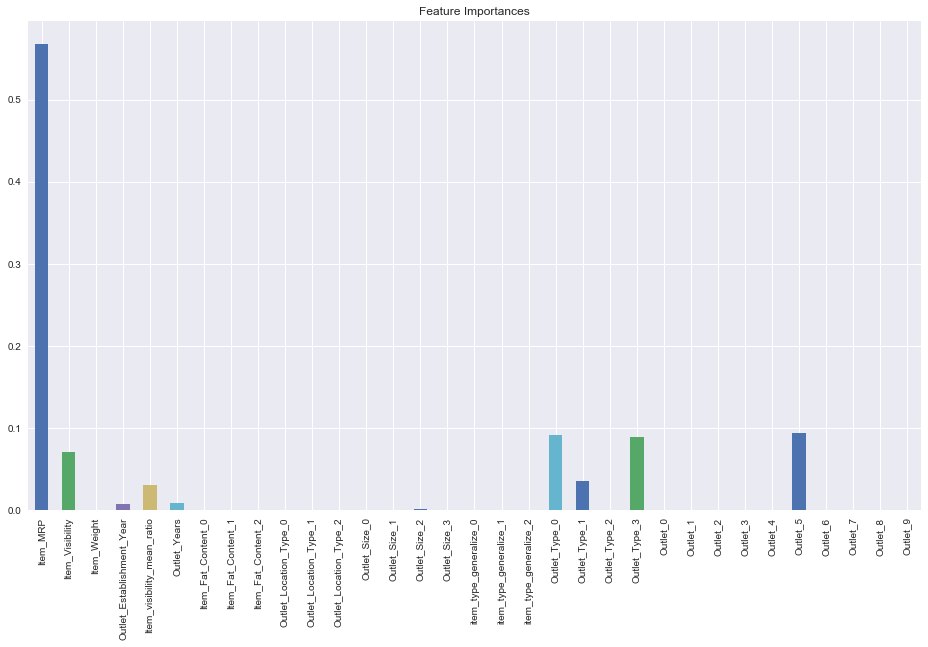

In [128]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in trainData.columns if x not in ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier']]
alg5=RandomForestRegressor(n_estimators=200,max_depth=3,min_samples_leaf=300,n_jobs=4)
ada2=AdaBoostRegressor(base_estimator=alg5)#,learning_rate=0.9)
#fit the algorithm on the data
ada2.fit(trainData[predictors],trainData[target])
coef5=pd.Series(ada2.feature_importances_,predictors)
coef5.plot(kind='bar',title='Feature Importances',figsize=(16,9))
#Print model report
print ("\nModel Report :")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(trainData[target].values,train_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
  